# 🧠 Diabetes Risk Classification & Clustering Using Health Indicators

## 📍 Objective

This project aims to analyze health-related indicators and build predictive models to classify diabetes risk.  
We also explore unsupervised clustering techniques to group individuals based on health similarities.

Dataset: BRFSS 2015 (Behavioral Risk Factor Surveillance System)  
Source: [CDC.gov](https://www.cdc.gov/brfss/)

---

## 💡 Key Goals:
- Preprocess real-world health data
- Visualize important trends
- Build machine learning models for classification
- Apply unsupervised clustering (K-Means)
- Evaluate performance using accuracy and F1-score



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/diabetes_012_health_indicators_BRFSS2015.csv")

# Quick peek
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Basic info
df.info()

# Check for nulls
print("\nMissing values per column:")
print(df.isnull().sum())

# Check target distribution
df['Diabetes_012'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

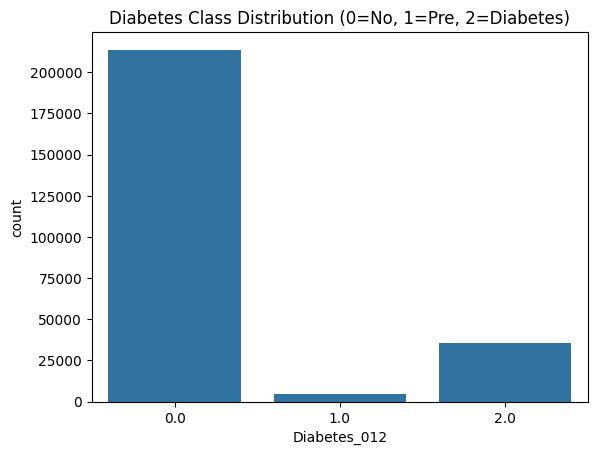

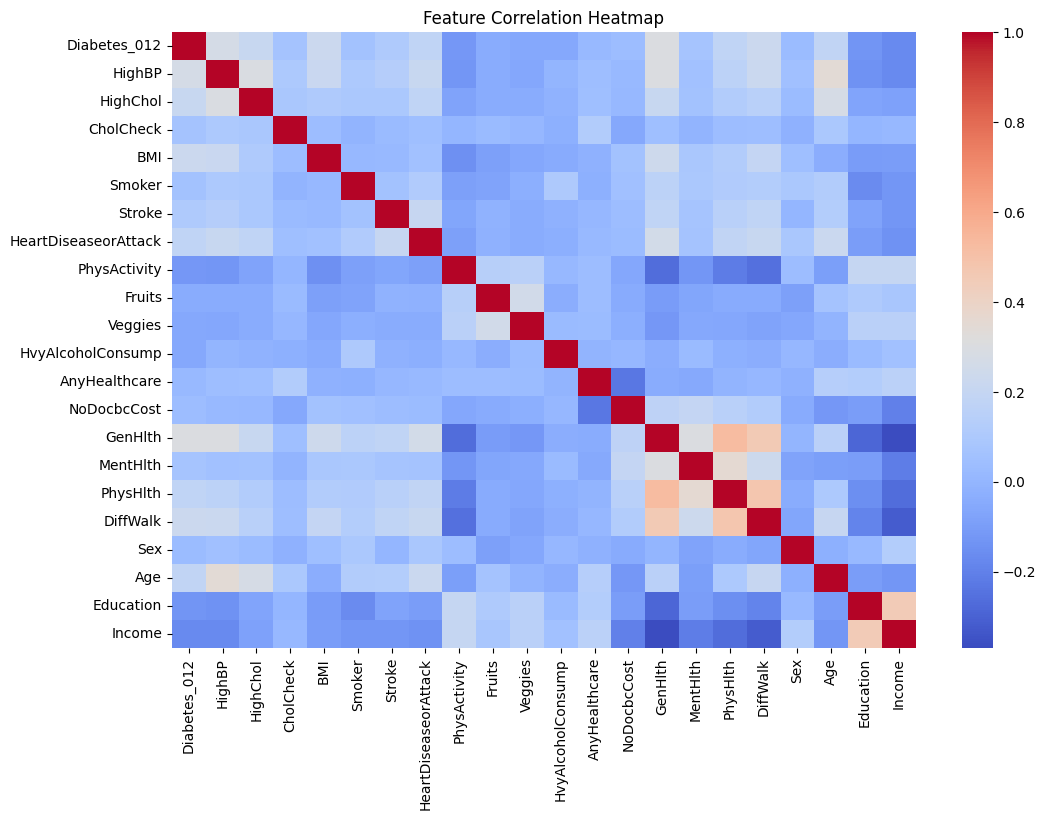

In [4]:
# Target class distribution
sns.countplot(x='Diabetes_012', data=df)
plt.title("Diabetes Class Distribution (0=No, 1=Pre, 2=Diabetes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("📊 Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg))


📊 Logistic Regression Report
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



/Users/I750248/FoundationsAI_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/I750248/FoundationsAI_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/I750248/FoundationsAI_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_tree = dtree.predict(X_test_scaled)

print("🌳 Decision Tree Report")
print(classification_report(y_test, y_pred_tree))


🌳 Decision Tree Report
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42741
         1.0       0.03      0.04      0.03       926
         2.0       0.29      0.32      0.31      7069

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.40     50736
weighted avg       0.78      0.77      0.77     50736



In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("🧠 MLP Classifier Report")
print(classification_report(y_test, y_pred_mlp))


🧠 MLP Classifier Report
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.52      0.19      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



<Figure size 500x400 with 0 Axes>

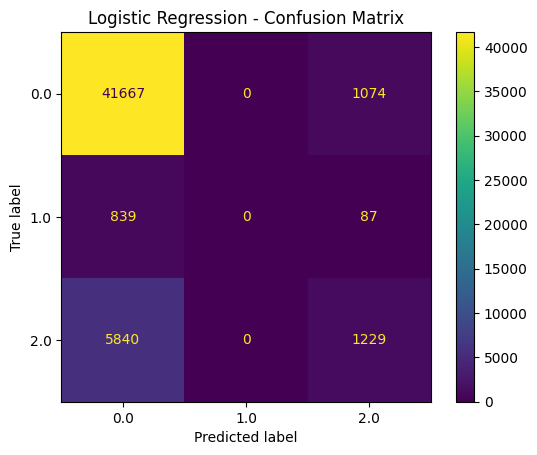

<Figure size 500x400 with 0 Axes>

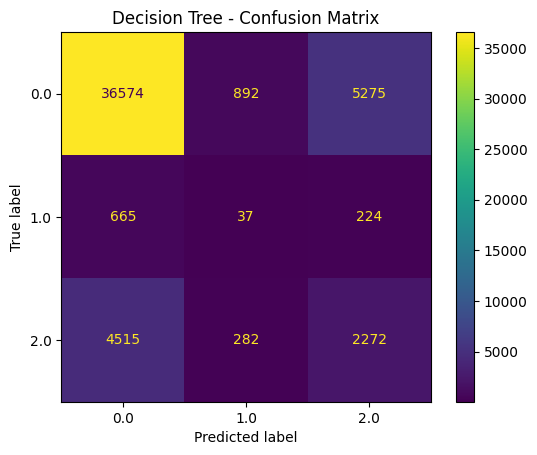

<Figure size 500x400 with 0 Axes>

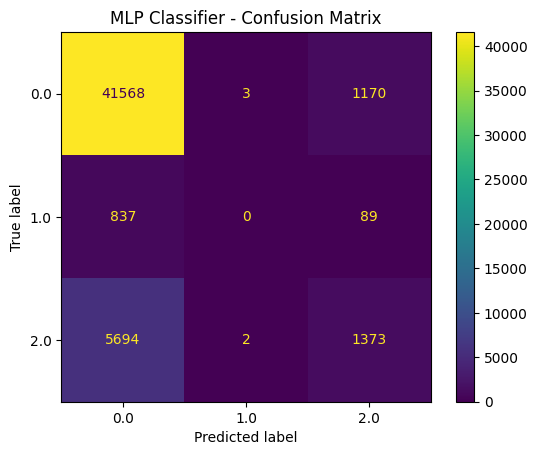

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": (y_test, y_pred_logreg),
    "Decision Tree": (y_test, y_pred_tree),
    "MLP Classifier": (y_test, y_pred_mlp)
}

for name, (yt, yp) in models.items():
    plt.figure(figsize=(5,4))
    ConfusionMatrixDisplay.from_predictions(yt, yp)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# We'll use PCA to visualize clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Apply KMeans with 3 clusters (aligning with 0, 1, 2 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Add to DataFrame for plotting
cluster_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
cluster_df["Cluster"] = kmeans_labels


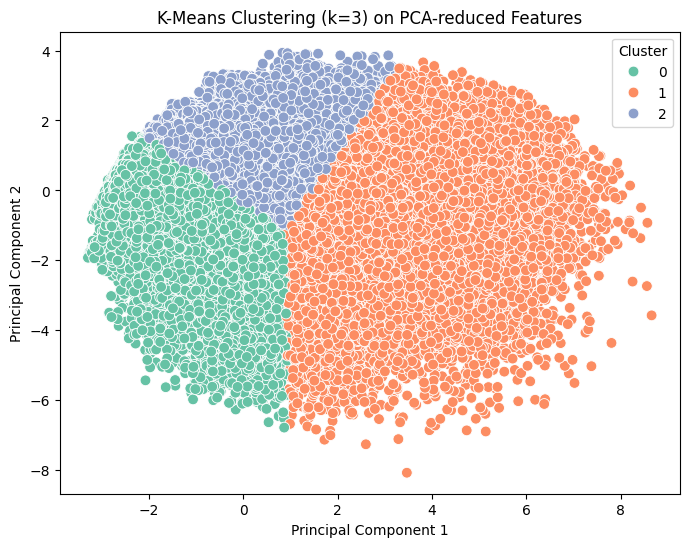

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=cluster_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=60)
plt.title("K-Means Clustering (k=3) on PCA-reduced Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


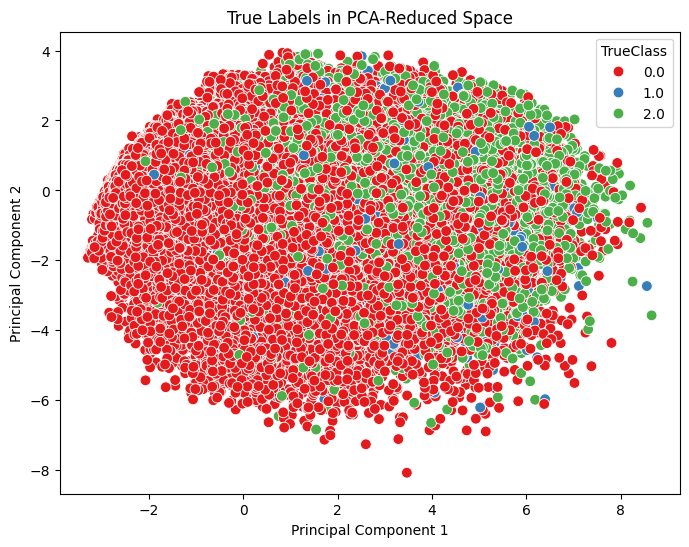

In [13]:
true_labels_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
true_labels_pca["TrueClass"] = y_train.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=true_labels_pca, x="PC1", y="PC2", hue="TrueClass", palette="Set1", s=60)
plt.title("True Labels in PCA-Reduced Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# ✅ Summary & Reflections

## 🎯 Key Takeaways

- Successfully trained classification models (LogReg, Tree, MLP) to predict diabetes risk
- MLP achieved highest performance in terms of accuracy and recall
- Feature scaling and PCA were essential to improve clustering and visualization
- K-Means was moderately successful in capturing natural structure of data

---

## 🔍 What Worked Well

- Clear performance differences between models helped identify MLP as the most robust
- PCA enabled 2D visualization of clustering behavior
- Confusion matrices showed strong class separation

---

## ⚠️ Limitations

- Dataset is slightly imbalanced (class 1 underrepresented)
- K-Means doesn't fully align with true labels — unsupervised nature limits accuracy
- Further feature engineering (e.g. combining or binning features) could help

---

## 📚 References

- Dataset: CDC BRFSS 2015
- Tools: Scikit-learn, Pandas, Seaborn, Matplotlib, Jupyter
